indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not

Frequency 2.3254186587e+11
Beam area 1.77551072716e-12
Pixel area 1.46902442703e-14
Pixels per beam area 120.863254177
Jy per Beam to Jy per pixel 0.00827381330088
51.40133334 30.754147222
Average Beam:  0.259108878672 10.3643551469
[[  1.02399917e+03   1.02399997e+03  -1.16266642e+02  -1.00000000e+00]]
[  5.18217757  10.36435515  15.54653272  20.72871029  25.91088787
  31.09306544  36.27524301  41.45742059  46.63959816  51.82177573
  57.00395331  62.18613088  67.36830845  72.55048603  77.7326636
  82.91484118  88.09701875  93.27919632  98.4613739 ]


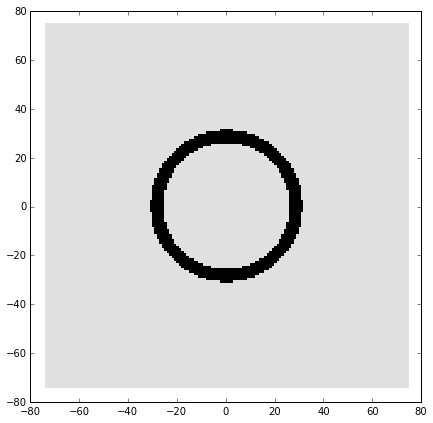

In [1]:
import numpy as np
#import pyfits as fits
import math
from astropy import wcs
from astropy.io import fits
from astropy.io import ascii
from scipy.interpolate import griddata
from scipy import stats
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
from astropy.table import Table, Column

%matplotlib inline

# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# CGS PHYSICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

c = 2.99792458e10       # speed of light CGS
h = 6.6260755e-27       # Planck's constant CGS
g = 6.67259e-8          # Grav const CGS
kb = 1.380658e-16       # Boltzmann's const CGS
a = 7.56591e-15         # Radiation constant CGS
sb = 5.67051e-5         # sigma (stefan-boltzmann const) CGS
qe =  4.803206e-10      # Charge of electron CGS
ev =  1.60217733e-12    # Electron volt CGS
na =  6.0221367e23      # Avagadro's Number
me =  9.1093897e-28     # electron mass CGS
mp =  1.6726231e-24     # proton mass CGS
mn = 1.674929e-24       # neutron mass CGS
mh = 1.673534e-24       # hydrogen mass CGS
amu =  1.6605402e-24    # atomic mass unit CGS
pi = 3.14159
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# ASTRONOMICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

# GENERAL
au = 1.496e13           # astronomical unit CGS
pc = 3.0857e18          # parsec CGS
yr = 3.155815e7         # sidereal year CGS
ms = 1.98900e+33        # solar mass CGS
rs = 6.9599e10          # sun's radius CGS
ls = 3.839e33           # sun's luminosity CGS
mm = 7.35000e+25        # moon mass CGS
mer = 5.97400e+27       # earth mass CGS
rer = 6.378e8           # earth's radius CGS
medd = 3.60271e+34      # Eddington mass CGS

# RADIO SPECIFIC
jy = 1.e-23                  # Jansky CGS
restfreq_hi = 1420405751.786 # 21cm transition (Hz)
restfreq_co = 115271201800.  # CO J=1-0 (Hz)
cm2perkkms_hi = 1.823e18     # HI column per intensity (thin)

pa=(90.0-25.0)*3.14159/180.0
#pa=(45.0)*3.14159/180.0
pa=0.0
inc=0.0
imagename='Per33_ALMA_cont_robust0.5.image.fits'
imagename='Per33_ALMA_cont_robust0.5_subclump_deproj.image.fits'
rms=1.4e-4
hdu = fits.open(imagename)
image = np.transpose(np.copy(hdu[0].data))
image=np.copy(hdu[0].data)
ra=3.426755556*15.0
dec=30.754147222
header= hdu[0].header
w = wcs.WCS(hdu[0].header)
    #w.wcs.print_contents()
    #pixcrd = numpy.array([[0, 0], [24, 38], [45, 98]], numpy.float_)
    #print pixcrd
    #pixcrd=np.array([[1000,1000],[1000,1000]])
    #world = w.wcs_pix2world(pixcrd, 0)
    #print(world)
pixscaledeg=header['CDELT2']
pixscale=header['CDELT2']*3600
bmaj=header['BMAJ']
bmin=header['BMIN']
npix=header['NAXIS1']
freq=header['CRVAL3']
omega=(pi*bmaj*bmin)*(pi/180.0)**2
beamarea=(omega)/(4.0*math.log(2.0))
pixelarea=(pixscaledeg*pi/180.0)**2
print 'Frequency', freq
print 'Beam area', beamarea
print 'Pixel area', pixelarea
jybm2jy=1.0/beamarea*pixelarea
pixelsperbeam=beamarea/pixelarea

print 'Pixels per beam area', pixelsperbeam
print 'Jy per Beam to Jy per pixel',jybm2jy
image=image[::-1][::-1][:][:]*jybm2jy
print ra,dec

avgbeam=(bmaj+bmin)/2.0*3600.0
print 'Average Beam: ', avgbeam,avgbeam/pixscale
aperturebase=avgbeam/pixscale/2.0

world=np.array([[ra,dec,0,0]  ])
pix=w.wcs_world2pix(world, 0)
print pix
xcen=pix[0][0]
ycen=pix[0][1]
apertures=np.arange(1.0,20.0, dtype=np.float)*aperturebase
print apertures

#xgrid_off=np.arange(npix,dtype=np.float)-npix/2.0
#xgrid_off=np.arange(npix,dtype=np.float)-1016
#ygrid_off=np.arange(npix,dtype=np.float)-npix/2.0

xgrid_off=np.arange(npix,dtype=np.float)-xcen
ygrid_off=np.arange(npix,dtype=np.float)-ycen

ygrid_proj=ygrid_off #/np.cos(inc)
#print ygrid_proj

xgrid,ygrid=np.meshgrid(xgrid_off,ygrid_proj)

r = np.sqrt(xgrid**2 + (ygrid)**2)
mask1 = r < apertures[5]
mask2 = r > apertures[4] 
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[950:1100],ygrid_proj[950:1100],mask[950:1100,950:1100], cmap='gray_r', vmin=-0.014, vmax=0.1)

0.0
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
(1, 1, 2048, 2048)
(2048, 2048)
(2048, 2048)


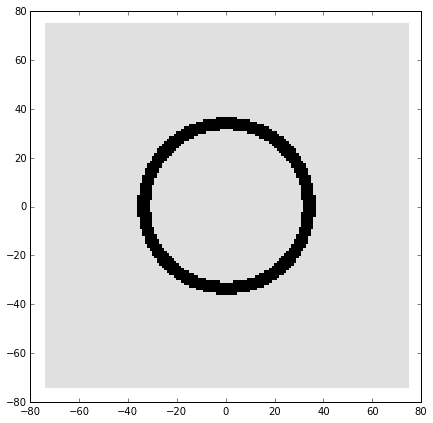

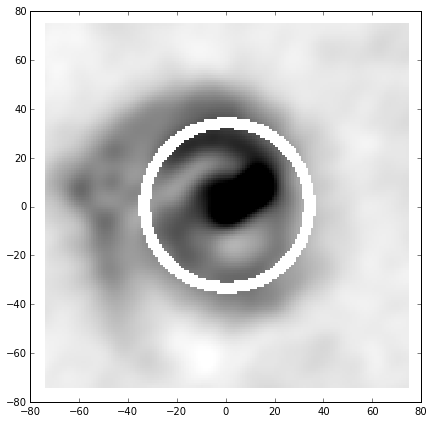

In [2]:

print pa

xgrid_rot= (xgrid * np.cos(pa) - ygrid * np.sin(pa)) # disk major axis
ygrid_rot= (xgrid * np.sin(pa) + ygrid * np.cos(pa)) # disk minor axis

#print xgrid_rot.shape
#print ygrid_rot.shape
#print xgrid_rot[1000:1050,1000:1050]
#print ygrid_rot[1000:1050,1000:1050]


r = np.sqrt(xgrid_rot**2 + (ygrid_rot/np.cos(inc))**2)
mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[950:1100],ygrid_off[950:1100],mask[950:1100,950:1100], cmap='gray_r', vmin=-0.014, vmax=0.1)

mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
print mask[1024][1000:1050]
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

print image.shape
print mask.shape
maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
print maskedimage.shape
plt.pcolormesh(xgrid_off[950:1100],ygrid_off[950:1100],maskedimage[950:1100,950:1100]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)

#ymin=int(round(ycen-apertures)+1)
#ymax=int(round(ycen+apertures)+1)
#xmin=int(round(xcen-apertures)+1)
#xmax=int(round(xcen+apertures)+1)
#print xmin,xmax,ymin,ymax

5.18217757344 0.0111164692789 0.000103091713729 0.0111164692789 0.000103091713729 89
10.3643551469 0.024434922263 0.000291900133255 0.024434922263 0.000291900133255 252
15.5465327203 0.0289202574641 0.000481866886643 0.0289202574641 0.000481866886643 416
20.7287102938 0.0299116820097 0.000690366981825 0.0299116820097 0.000690366981825 596
25.9108878672 0.0339955948293 0.000857167057971 0.0339955948293 0.000857167057971 740
31.0930654407 0.041616242379 0.00109810050129 0.041616242379 0.00109810050129 948
36.2752430141 0.038154810667 0.00128343391923 0.038154810667 0.00128343391923 1108
41.4574205875 0.0330728851259 0.00145950066627 0.0330728851259 0.00145950066627 1260
46.639598161 0.0290955286473 0.00164946741966 0.0290955286473 0.00164946741966 1424
51.8217757344 0.0227763205767 0.00183943417305 0.0227763205767 0.00183943417305 1588
57.0039533079 0.0147756366059 0.00204793426823 0.0147756366059 0.00204793426823 1768
62.1861308813 0.00724343722686 0.00227033436976 0.00724343722686 0.00

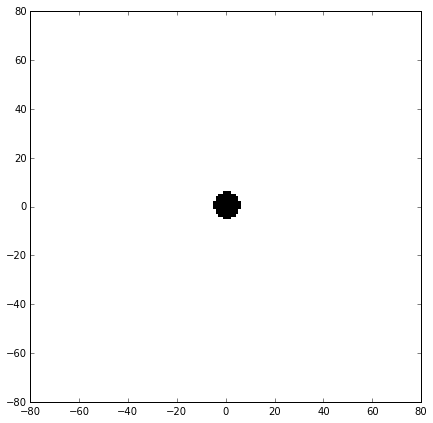

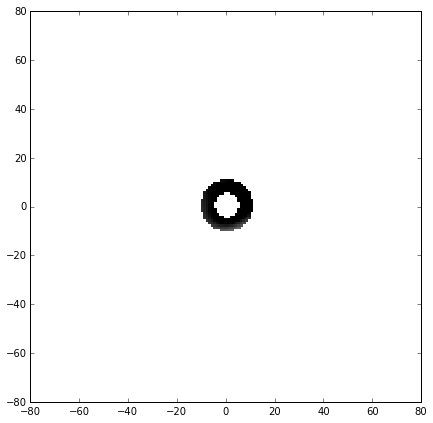

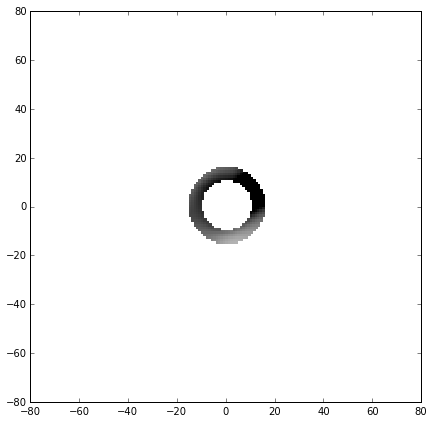

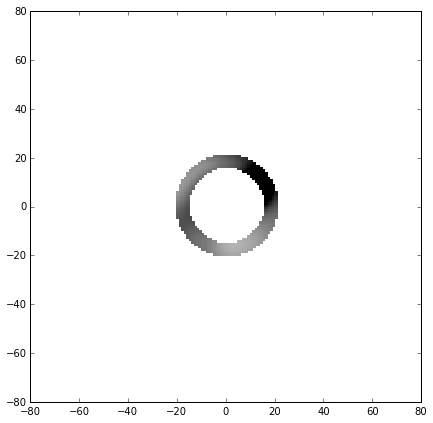

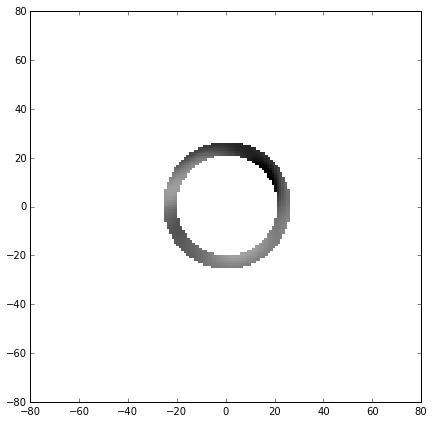

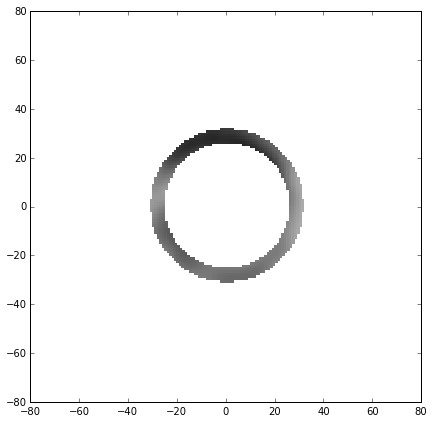

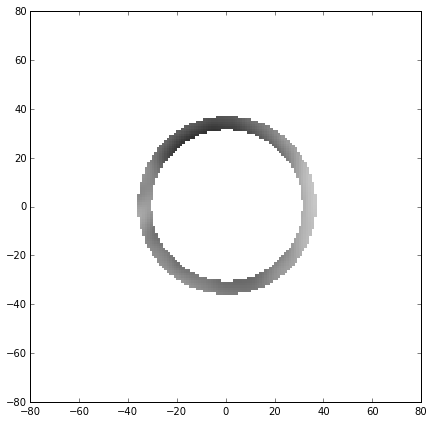

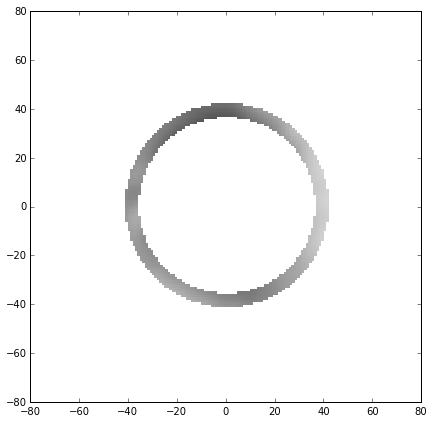

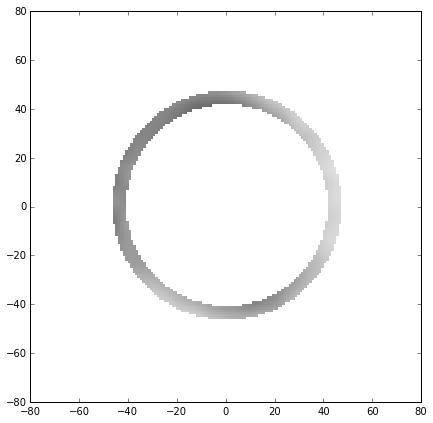

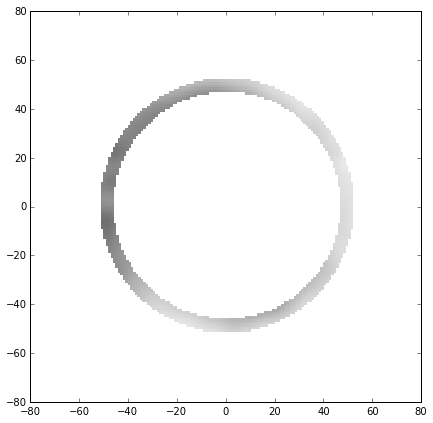

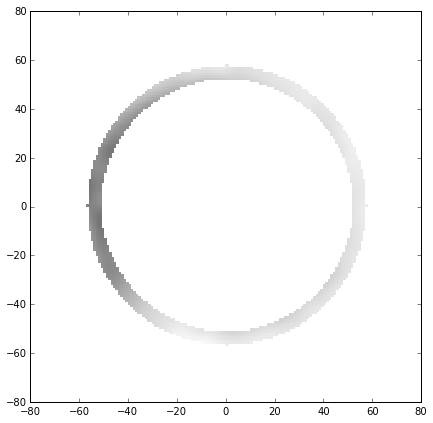

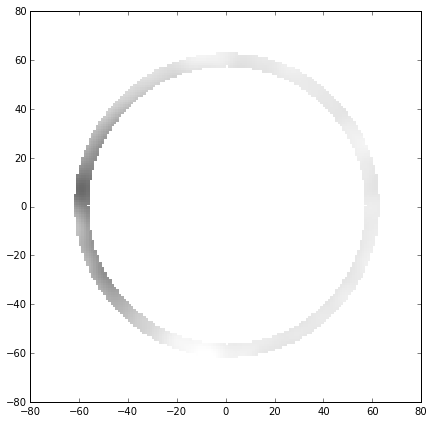

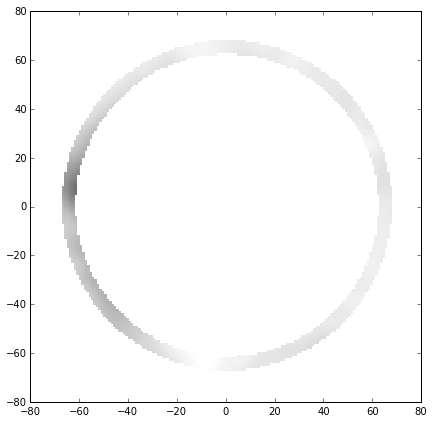

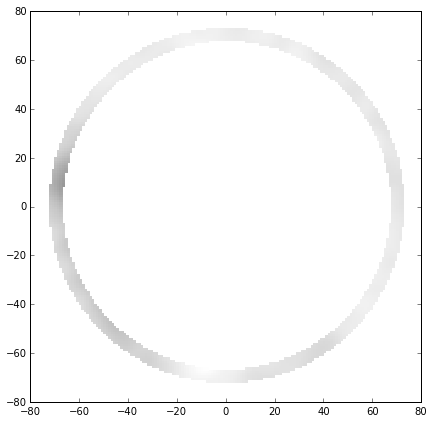

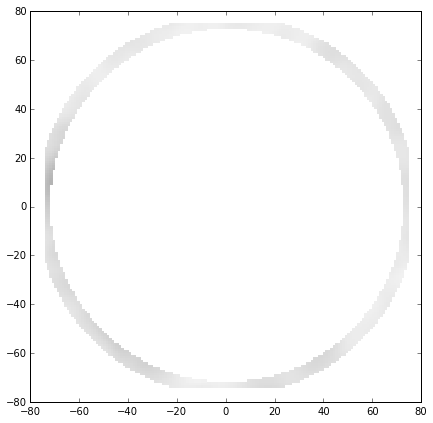

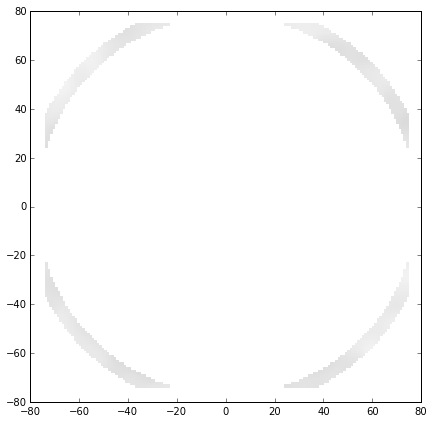

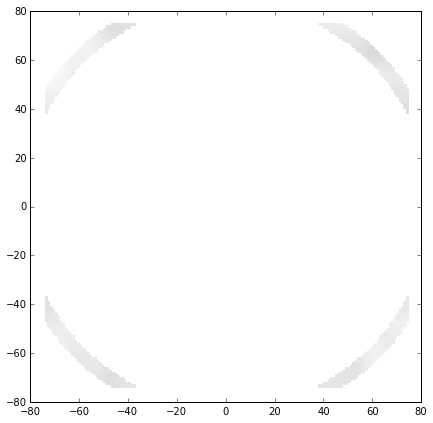

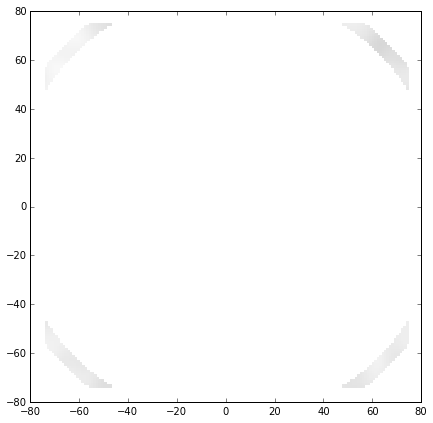

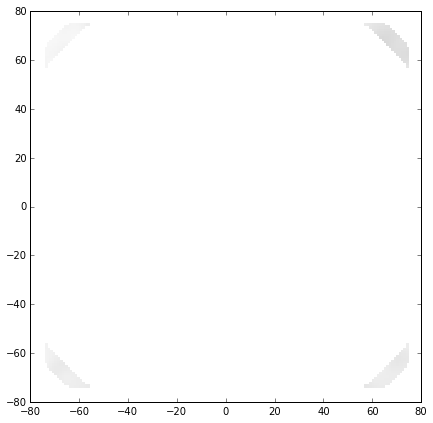

In [3]:
aper_fluxes=np.zeros(len(apertures))
error_aper_fluxes=np.zeros(len(apertures))
diff_aper_fluxes=np.zeros(len(apertures))
error_diff_aper_fluxes=np.zeros(len(apertures))
diff_area=np.zeros(len(apertures))

for i in range(len(apertures)):
    if i == 0:
        mask = r > apertures[0]
        maskinverse=r < apertures[0]
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
        npixels=np.sum(~mask)
    elif i > 0:  
        mask1 = r > apertures[i-1]
        mask2 = r <= apertures[i]
        mask = mask1*mask2
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=~mask)
        npixels=np.sum(mask)
    fig=plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.pcolormesh(xgrid_off[950:1100],ygrid_off[950:1100],maskedimage[950:1100,950:1100]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)
    aper_fluxes[i]=np.sum(maskedimage)

    error_aper_fluxes[i]=npixels/pixelsperbeam*rms
    if i == 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159
    elif i > 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159 -(apertures[i-1]*pixscale*230.0)**2*3.14159

    print apertures[i], aper_fluxes[i],error_aper_fluxes[i], diff_aper_fluxes[i],error_diff_aper_fluxes[i],npixels

    

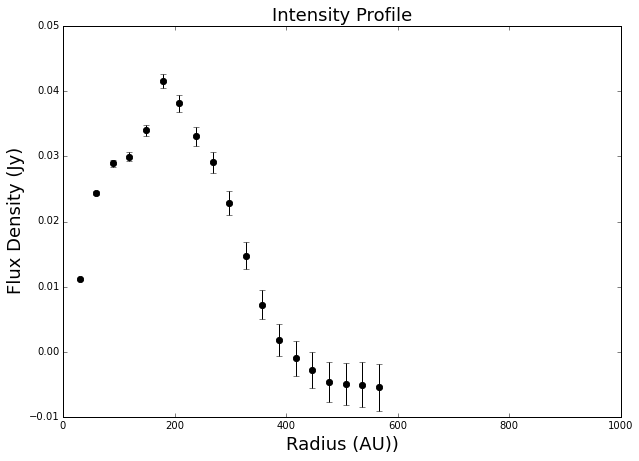

In [4]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(0,520.0)
#ax.set_ylim(-0.001,0.01)

radii=apertures*pixscale*230.0
lin1=ax.plot(radii,diff_aper_fluxes,marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii,diff_aper_fluxes, yerr=error_diff_aper_fluxes, fmt='o',color='black')

ax.set_title('Intensity Profile', fontsize=18)
ax.set_ylabel('Flux Density (Jy)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)


472.754152333
      R      
-------------
75.4760209606
76.3951991317
77.3255714345
78.2672741959
79.2204454017
80.1852247213
81.1617535214
 82.150174893
83.1506336684
84.1632764445
          ...
265.793505317
269.030448455
272.306812423
275.623077306
278.979729033
282.377259452
  285.8161664
289.296953778
292.820131623
296.386216183
299.995729995
Length = 115 rows
-0.418746248482 2.31465548932 -0.999946625036 2.99624228491e-226 0.000407017319388
[ 51.65589021  37.55371446  31.48604195  27.84618412  25.34249175
  23.48352823  22.03322085  20.86228494  19.89256732  19.07333791 -99.         -99.
 -99.         -99.         -99.         -99.         -99.         -99.         -99.        ]
(array([10, 11, 12, 13, 14, 15, 16, 17, 18]),)
[ 51.65589021  37.55371446  31.48604195  27.84618412  25.34249175
  23.48352823  22.03322085  20.86228494  19.89256732  19.07333791
  18.23393244  17.58152422  17.00200038  16.48248944  16.01311486
  15.58615159  15.1954565   14.83607326  14.50395181]
[ 12.03

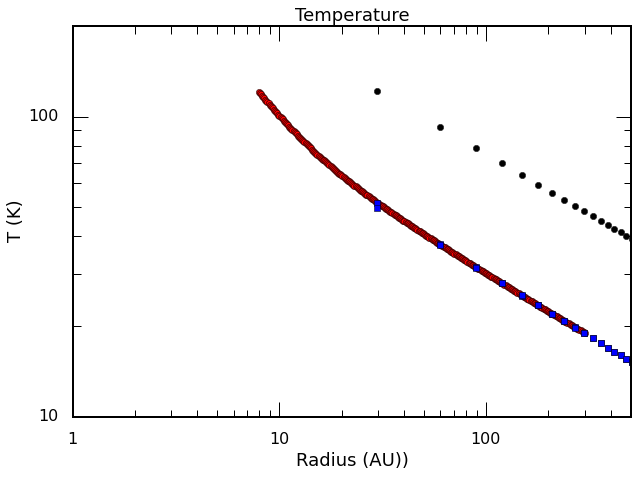

In [5]:
L_system=8.3
teq_at_1AU=(L_system*ls/(16.0*sb*pi*(au)**2))**0.25
print teq_at_1AU
temp=(radii/1.0)**(-0.4)*teq_at_1AU
#print radii,temp

modeltemp=ascii.read('TvsR.dat',names=['R', 'T'])

modeltemp['R']=modeltemp['R']/1.496e13
#print modeltemp
newtemp=griddata(modeltemp['R'],modeltemp['T'],radii,method='linear',fill_value=-99.0)
ind = (modeltemp['R'] > 75.0).nonzero()

print modeltemp['R'][ind]


slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(modeltemp['R'][ind]),np.log10(modeltemp['T'][ind]))
print slope, intercept, r_value, p_value, std_err
newtempextrap=(radii/radii[6])**(slope)*newtemp[6]
print newtemp

ind = (newtemp == -99.0).nonzero()
print ind
newtemp[ind]=newtempextrap[ind]

print newtemp

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(1,500.0)
ax.set_ylim(10,200.0)

radii=apertures*pixscale*230.0
lin1=ax.loglog(radii,temp,marker='o',color='black',linestyle='none')
lin1=ax.loglog(modeltemp['R'],modeltemp['T'],marker='o',color='red',linestyle='none')
lin1=ax.loglog(radii,newtemp,marker='s',color='blue',linestyle='none')
lin1=ax.loglog(radii,newtempextrap,marker='s',color='blue',linestyle='none')

ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)
ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Temperature', fontsize=18)
ax.set_ylabel('T (K)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)


def emissive_mass(flux=None,lam=None,lam0=None,beta=None,kappa0=None,distance=None,temp=None):
    #temp=30.0
    kb=1.36e-16
    dgr=100.0
    flux=flux*1.0e-23
    nu=3.0e11/lam
    #print nu/1.0e9, 'GHz'
    #kappa0=3.5
    kappa=kappa0*(lam0/lam)**beta
    #print kappa, ' at ',lam,' mm'
    distance=distance*3.09e18
    mass=distance**2*flux*3e10**2/(2.0*kappa*kb*nu**2*temp)*dgr

    return mass

diff_percent_errors=error_diff_aper_fluxes/diff_aper_fluxes
percent_errors=error_aper_fluxes/aper_fluxes
mass_vs_r=emissive_mass(diff_aper_fluxes,1.3,1.3,1.0,0.899,230.0,newtemp)
total_mass_vs_r=emissive_mass(aper_fluxes,1.3,1.3,1.0,0.899,230.0,newtemp)

#print mass_vs_r

sigma=mass_vs_r/(diff_area*1.496e13**2)
#sigma=mass_vs_r/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
sigma2=total_mass_vs_r/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
print sigma
#,sigma2

data = Table([radii, sigma, newtemp], names=['R(AU)', 'sigma(g/cm-2)', 'T(K)'])
ascii.write(data, 'sigmavsR.dat')

[  29.79752105   59.59504209   89.39256314  119.19008419  148.98760524
  178.78512628  208.58264733  238.38016838]
[-0.48509544  0.27028953] [ 0.1929386   0.08221633]


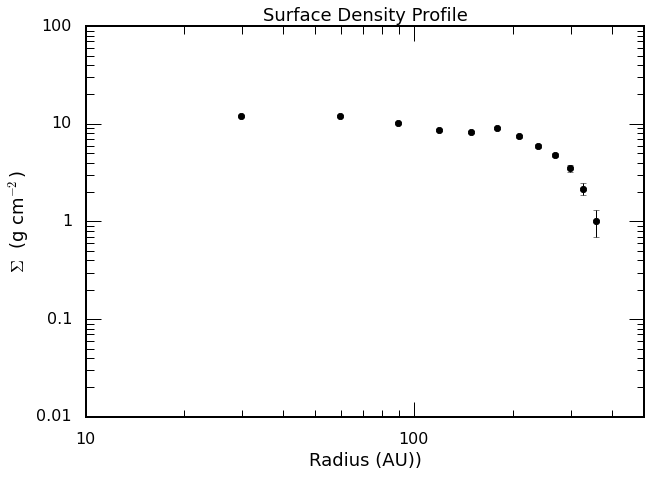

In [28]:
fig=plt.figure(figsize=(10,7))
#fig, ax1 = plt.subplots()
ax = fig.add_subplot(111)
ax.set_xlim(10,500.0)
ax.set_ylim(0.01,100.0)

ind = (radii < 375.0).nonzero()

radii=apertures*pixscale*230.0
lin1=ax.loglog(radii[ind],sigma[ind],marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii[ind],sigma[ind], yerr=sigma[ind]*diff_percent_errors[ind], fmt='o',color='black')
#lin2=ax.errorbar(radii[ind],diff_aper_fluxes[ind], yerr=error_diff_aper_fluxes[ind], fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)


plt.savefig('Per33-surface-density-loglog.eps')

from scipy import optimize

def func(x, a, b):
    return x**a +b

ind = (radii < 250.0).nonzero()
#print ind
print radii[ind]
logerrors=0.434*diff_percent_errors
popt,pcov = optimize.curve_fit(func, np.log10(radii[ind]),np.log10(sigma[ind]),sigma=logerrors[ind])

perr = np.sqrt(np.diag(pcov))
print popt,perr

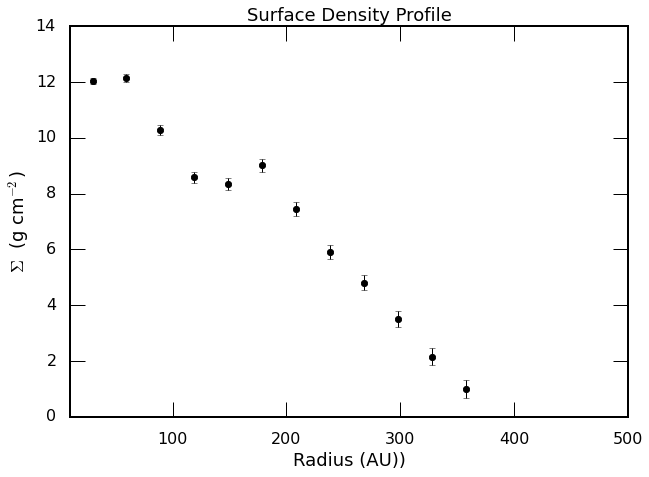

In [11]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(10,500.0)
#ax.set_ylim(-0.001,0.01)
ind = (radii < 375.0).nonzero()

#radii=apertures*pixscale*230.0
lin1=ax.plot(radii[ind],sigma[ind],marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii[ind],sigma, yerr=sigma*diff_percent_errors, fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('Per33-surface-density-linear.eps')


In [8]:
Omega=np.sqrt(g*1.06*1.99e33)/(2.0*pi*(radii*au)**1.5)
print 0.75/np.sin(45.0*pi/180.0), math.sin(35.0*pi/180.0)

cs=(1.5*kb*temp*2.0/(3.34e-24*2.36))**0.5
print 'radii :',radii
print 'omega :', Omega,1.0/Omega/3.14e7
print 'sound speed:',cs/1.0e5
Q_toomre= Omega*cs/(pi*g*sigma)
print 'Toomre Q:',Q_toomre

1.06066087542 0.573576013688
radii : [  29.79752105   59.59504209   89.39256314  119.19008419  148.98760524
  178.78512628  208.58264733  238.38016838  268.17768943  297.97521047
  327.77273152  357.57025257  387.36777361  417.16529466  446.96281571
  476.76033676  506.5578578   536.35537885  566.1528999 ]
omega : [  2.00622481e-10   7.09307583e-11   3.86098144e-11   2.50778101e-11
   1.79442202e-11   1.36506308e-11   1.08325957e-11   8.86634479e-12
   7.43046225e-12   6.34423989e-12   5.49908672e-12   4.82622680e-12
   4.28020498e-12   3.82990095e-12   3.45336679e-12   3.13472626e-12
   2.86224110e-12   2.62706512e-12   2.42241861e-12] [   158.74160081    448.98904956    824.84555364   1269.93280649
   1774.78505136   2333.01553765   2939.93558927   3591.91239649
   4286.02322191   5019.85017986   5791.34961364   6598.76442913
   7440.56275658   8315.39356571   9222.0536444   10159.46245194
  11126.64258454  12122.70433815  13146.8333254 ]
sound speed: [ 0.79938519  0.69590523  0.6416

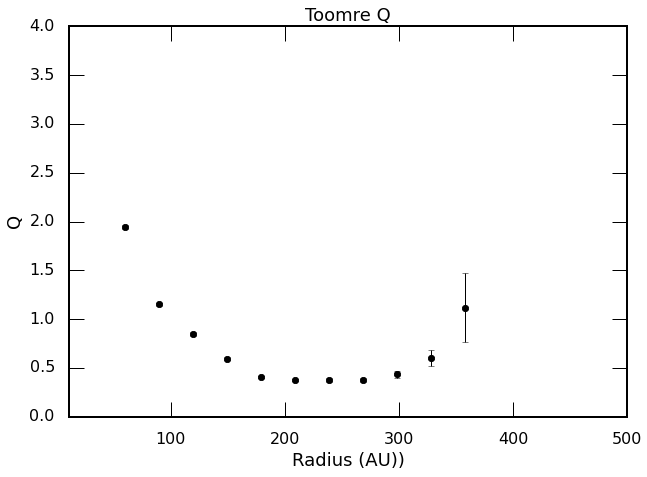

In [9]:
    fig=plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    ax.set_xlim(10,500.0)
    ax.set_ylim(0,4)
    ind = (radii < 375.0).nonzero()

    #radii=apertures*pixscale*230.0
    lin1=ax.plot(radii[ind],Q_toomre[ind],marker='o',color='black',linestyle='none')
    lin1err=ax.errorbar(radii[ind],Q_toomre[ind], yerr=Q_toomre[ind]*diff_percent_errors[ind], fmt='o',color='black')
    #lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
    #lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
    ax.tick_params('both', which='major', length=15, width=1, pad=15)
    ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)
    
    ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
                label.set_fontproperties(ticks_font)
    
    #for axis in [ax.xaxis, ax.yaxis]:
    #    axis.set_major_formatter(ScalarFormatter())
    #    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
    for axis in ['top','bottom','left','right']:
       ax.spines[axis].set_linewidth(2)
    
    ax.set_title('Toomre Q', fontsize=18)
    ax.set_ylabel('Q', fontsize=18)
    ax.set_xlabel('Radius (AU))', fontsize=18)
    plt.savefig('Per33-toomre-Q-linear.eps')


[  29.79752105   59.59504209   89.39256314  119.19008419  148.98760524
  178.78512628  208.58264733  238.38016838]
[-0.48509544  0.27028953] [ 0.1929386   0.08221633]


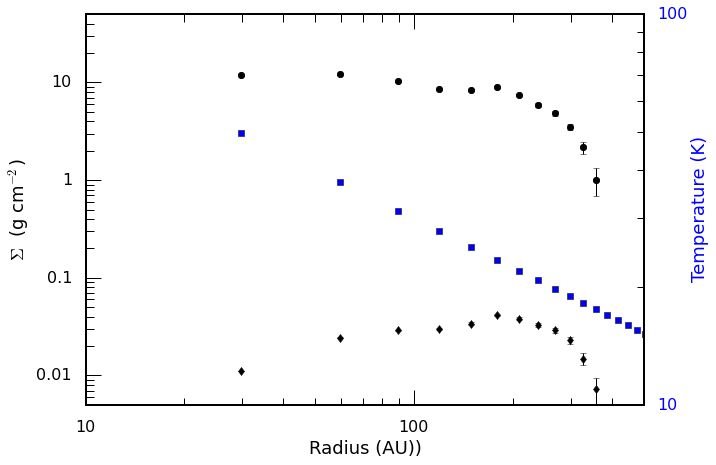

In [37]:
#fig=plt.figure(figsize=(10,7))
fig, ax1 = plt.subplots(figsize=(10,7))

ax2=ax1.twinx()

#ax = fig.add_subplot(111)
ax1.set_xlim(10,500.0)
ax1.set_ylim(0.005,50.0)

ind = (radii < 375.0).nonzero()

radii=apertures*pixscale*230.0
ax1.loglog(radii[ind],sigma[ind],marker='o',color='black',linestyle='none')
ax1.errorbar(radii[ind],sigma[ind], yerr=sigma[ind]*diff_percent_errors[ind], fmt='o',color='black')
ax1.errorbar(radii[ind],diff_aper_fluxes[ind], yerr=error_diff_aper_fluxes[ind], fmt='d',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax1.tick_params('both', which='major', length=15, width=1, pad=15)
ax1.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax1.xaxis, ax1.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax1.spines[axis].set_linewidth(2)

ax1.set_title('', fontsize=18)
ax1.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax1.set_xlabel('Radius (AU))', fontsize=18)


ax2.loglog(radii,newtempextrap,marker='s',color='blue',linestyle='none')
ax2.tick_params('both', which='major', length=15, width=1, pad=15)
ax2.tick_params('both', which='minor', length=7.5, width=1, pad=15)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax2.xaxis, ax2.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

    ax2.set_ylabel('Temperature (K)', color='b', fontsize=18)
    
for tl in ax2.get_yticklabels():
    tl.set_color('b')
    
plt.savefig('Per33-surface-dens-int-temp-loglog.eps')

from scipy import optimize

def func(x, a, b):
    return x**a +b

ind = (radii < 250.0).nonzero()
#print ind
print radii[ind]
logerrors=0.434*diff_percent_errors
popt,pcov = optimize.curve_fit(func, np.log10(radii[ind]),np.log10(sigma[ind]),sigma=logerrors[ind])

perr = np.sqrt(np.diag(pcov))
print popt,perr